<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи-исследования-и-загрузка-данных." data-toc-modified-id="Постановка-задачи-исследования-и-загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи исследования и загрузка данных.</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></li><li><span><a href="#Проверка-адекватности-исследования" data-toc-modified-id="Проверка-адекватности-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка адекватности исследования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Список-вопросов-заказчику:" data-toc-modified-id="Список-вопросов-заказчику:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Список вопросов заказчику:</a></span></li><li><span><a href="#Добавление-дополнительных-параметров-и-объединение-таблиц" data-toc-modified-id="Добавление-дополнительных-параметров-и-объединение-таблиц-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Добавление дополнительных параметров и объединение таблиц</a></span></li><li><span><a href="#Выбор-оптимальной-модели" data-toc-modified-id="Выбор-оптимальной-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор оптимальной модели</a></span></li><li><span><a href="#Тестирование-модели:" data-toc-modified-id="Тестирование-модели:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование модели:</a></span></li><li><span><a href="#Отчет-о-проделанной-работе:" data-toc-modified-id="Отчет-о-проделанной-работе:-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчет о проделанной работе:</a></span></li></ul></div>

# Финальный проект. Промышленность.

## Постановка задачи исследования и загрузка данных.

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-pastel')
import seaborn as sns 
import numpy as np 
from termcolor import colored

pd.options.display.max_columns = None # полностью отображаем столбцы

import warnings
warnings.filterwarnings('ignore')

Загрузим данные:

In [3]:
try:
    df_arc = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_arc.csv')
    df_bulk = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_gas.csv')
    df_temp = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_temp.csv')
    df_wire = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('C:/Users/cool-/Desktop/DATA/jupiter_files/FINAL_PROJECT/final_steel/final_steel/data_wire_time.csv')
except:
    try:
        df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
        df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
        df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
        df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
        df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
        df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
        df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
    except:
        df_arc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_arc.csv')
        df_bulk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_bulk.csv')
        df_bulk_time = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_bulk_time.csv')
        df_gas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_gas.csv')
        df_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_temp.csv')
        df_wire = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_wire.csv')
        df_wire_time = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/final_steel/data_wire_time.csv')

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## План проекта

Для получения модели с необходимыми метриками, необходимо сделать следующие шаги:

1. Провести исследовательский анализ данных таблиц, построить графики, рассмотреть значения, сделать выводы.
2. Удалить из таблиц аномальные значения, ошибки. Уточнить, является ли это ошибкой. Рассчитать новые значения.
3. Провести проверку адекватности данных.
4. Объединить таблицы в итоговую, на основе которой будут использовать модель.
5. Исключить из таблицы строки, которые не прошли адекватность.
6. Исключить строки, в которых отсутствует целевое значение.
7. Заполнить пропуски, где необходимо.
8. Разделить выборку на тестовую и тренировочную.
9. Обучить модель и рассмотреть полученные метрики.

## Исследование данных

Проанализируем данные:

In [4]:
# создадим словарь с таблицами, чтобы упростить код

datasets_dict = {
    'Данные об электродах':df_arc, 
    'Данные о подаче сыпучих материалов (объём)':df_bulk, 
    'Данные о подаче сыпучих материалов (время)':df_bulk_time,
    'Данные о продувке сплава газом':df_gas,
    'Результаты измерения температуры':df_temp,
    'Данные о проволочных материалах (объём)':df_wire,
    'Данные о проволочных материалах (время)':df_wire_time
}

Рассмотрим данные:

In [5]:
for data in datasets_dict:
    print(colored(data, "blue", attrs=["bold"]))
    display(datasets_dict[data].head(10))
    display(datasets_dict[data].info())
    print('---------------------------')

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

---------------------------
Данные о подаче сыпучих материалов (объём)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

---------------------------
Данные о подаче сыпучих материалов (время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

---------------------------
Данные о продувке сплава газом


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

---------------------------
Результаты измерения температуры


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

---------------------------
Данные о проволочных материалах (объём)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

---------------------------
Данные о проволочных материалах (время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

---------------------------


**Как видно из данных:**

В таблице `data_arc.csv`: 
* содержатся данные об электродах, то есть нагреве сырья, времени начала нагрева и конце, а также мощностях. Исходя из данных мощностей можно рассчитать полную мощность, а при умножении полной мощности на время нагрева получим **энергию** которая будет дополнительным фичем в модели. Пропусков в таблице нет.

В таблицах `data_bulk.csv` и связанной таблице `data_bulk_time.csv`, а так же в `data_wire.csv` и связанной таблице `data_wire_time.csv`:
* содержатся данные о подаче примесей для корректировки химического состава - времени подачи, а так же их объём. Как видно из данных - в таких таблицах много пропусков, так как, скорее всего, какая-либо примесь могла просто не добавляться. Такие пропуски можно заполнить нулями.

В таблице `data_gas.csv`:
* содержатся данные о подаче о продувке сплава газом. Как видно из данных, пропусков нет. Временных промежутков нет, то есть данные только об общем подаче газа на один ковш.

В таблице `data_temp.csv`:
* содержатся данные о результаты измерения температуры. В данной таблице содержится целевая метрика, необходимая для исследования - конечная температура. В таблице много пропусков целевой метрики, скорее всего такие строки придется отбросить, чтобы не искажать исследование.

**Исследуем данные:**

In [6]:
for data in datasets_dict:
    print(colored(data, "blue", attrs=["bold"]))
    display(datasets_dict[data].drop('key', axis=1).describe().T\
            .style.background_gradient(cmap='GnBu'))
    print('---------------------------')

Данные об электродах


,count,mean,std,min,25%,50%,75%,max
Активная мощность,14876.000000,0.670441,0.408159,0.030002,0.395297,0.555517,0.857034,3.731596
Реактивная мощность,14876.000000,0.452592,5.878702,-715.504924,0.290991,0.415962,0.637371,2.676388


---------------------------
Данные о подаче сыпучих материалов (объём)


,count,mean,std,min,25%,50%,75%,max
Bulk 1,252.000000,39.242063,18.277654,10.000000,27.000000,31.000000,46.000000,185.000000
Bulk 2,22.000000,253.045455,21.180578,228.000000,242.000000,251.500000,257.750000,325.000000
Bulk 3,1298.000000,113.879045,75.483494,6.000000,58.000000,97.500000,152.000000,454.000000
Bulk 4,1014.000000,104.394477,48.184126,12.000000,72.000000,102.000000,133.000000,281.000000
Bulk 5,77.000000,107.025974,81.790646,11.000000,70.000000,86.000000,132.000000,603.000000
Bulk 6,576.000000,118.925347,72.057776,17.000000,69.750000,100.000000,157.000000,503.000000
Bulk 7,25.000000,305.600000,191.022904,47.000000,155.000000,298.000000,406.000000,772.000000
Bulk 8,1.000000,49.000000,nan,49.000000,49.000000,49.000000,49.000000,49.000000
Bulk 9,19.000000,76.315789,21.720581,63.000000,66.000000,68.000000,70.500000,147.000000
Bulk 10,176.000000,83.284091,26.060347,24.000000,64.000000,86.500000,102.000000,159.000000


---------------------------
Данные о подаче сыпучих материалов (время)


,count,unique,top,freq
Bulk 1,252,252,2019-08-18 22:05:13,1
Bulk 2,22,22,2019-05-07 15:45:34,1
Bulk 3,1298,1298,2019-05-08 13:11:13,1
Bulk 4,1014,1014,2019-06-23 16:02:17,1
Bulk 5,77,77,2019-07-01 23:42:34,1
Bulk 6,576,576,2019-05-16 08:42:22,1
Bulk 7,25,25,2019-05-15 09:35:53,1
Bulk 8,1,1,2019-07-05 17:46:11,1
Bulk 9,19,19,2019-05-14 03:30:41,1
Bulk 10,176,176,2019-07-25 07:01:54,1


---------------------------
Данные о продувке сплава газом


,count,mean,std,min,25%,50%,75%,max
Газ 1,3239.000000,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.995040


---------------------------
Результаты измерения температуры


,count,mean,std,min,25%,50%,75%,max
Температура,13006.000000,1591.840920,21.375851,1191.000000,1581.000000,1591.000000,1601.000000,1705.000000


---------------------------
Данные о проволочных материалах (объём)


,count,mean,std,min,25%,50%,75%,max
Wire 1,3055.000000,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.000000,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.000000,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.000000,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.000000,15.132000,nan,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.000000,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.000000,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.000000,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.000000,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


---------------------------
Данные о проволочных материалах (время)


,count,unique,top,freq
Wire 1,3055,3055,2019-08-20 18:58:54,1
Wire 2,1079,1079,2019-08-26 20:03:34,1
Wire 3,63,63,2019-08-08 10:23:01,1
Wire 4,14,14,2019-05-07 08:48:23,1
Wire 5,1,1,2019-08-08 16:01:07,1
Wire 6,73,73,2019-07-24 00:16:25,1
Wire 7,11,11,2019-08-08 13:05:02,1
Wire 8,19,19,2019-08-11 12:13:47,1
Wire 9,29,29,2019-06-07 21:42:24,1


---------------------------


**Рассмотрим графики:**

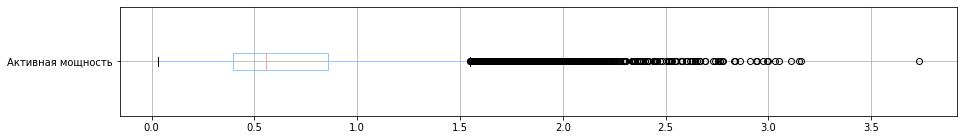

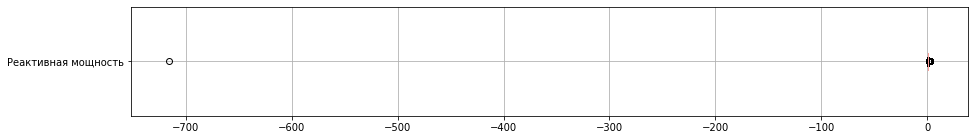

In [7]:
plt.figure(figsize=(15, 2))
df_arc.boxplot('Активная мощность', vert=False)
plt.show()

plt.figure(figsize=(15, 2))
df_arc.boxplot('Реактивная мощность', vert=False)
plt.show()

Видно сразу, что есть выброс в столбце реактивной мощности. Удалим строку и посмотрим график:

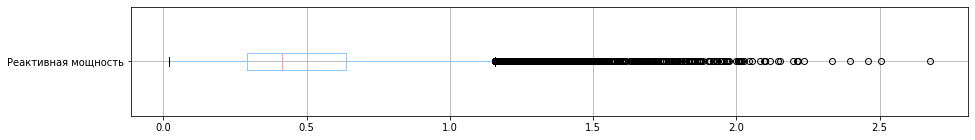

In [8]:
df_arc = df_arc[df_arc['Реактивная мощность']>=0]

plt.figure(figsize=(15, 2))
df_arc.boxplot('Реактивная мощность', vert=False)
plt.show()

Рассмотрим плотность распределения:

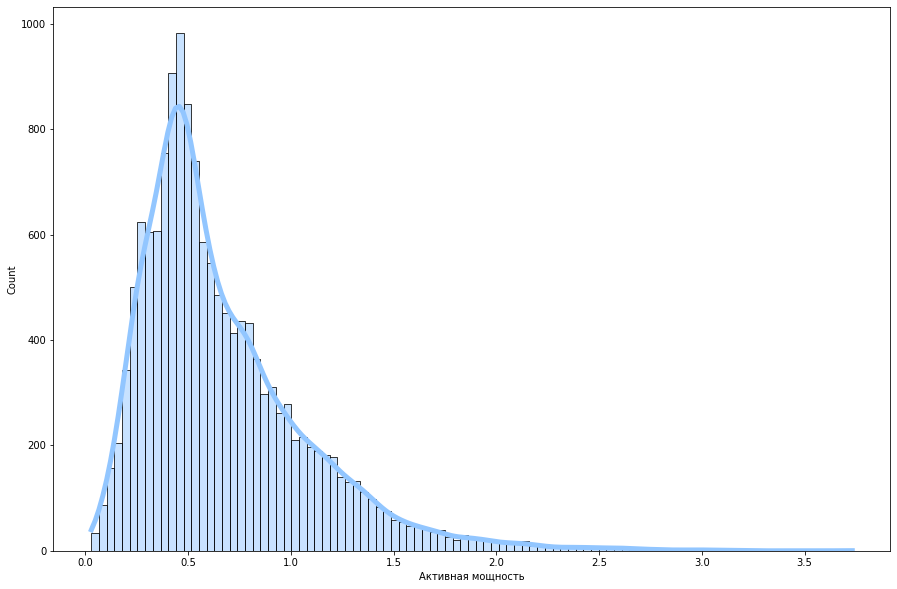

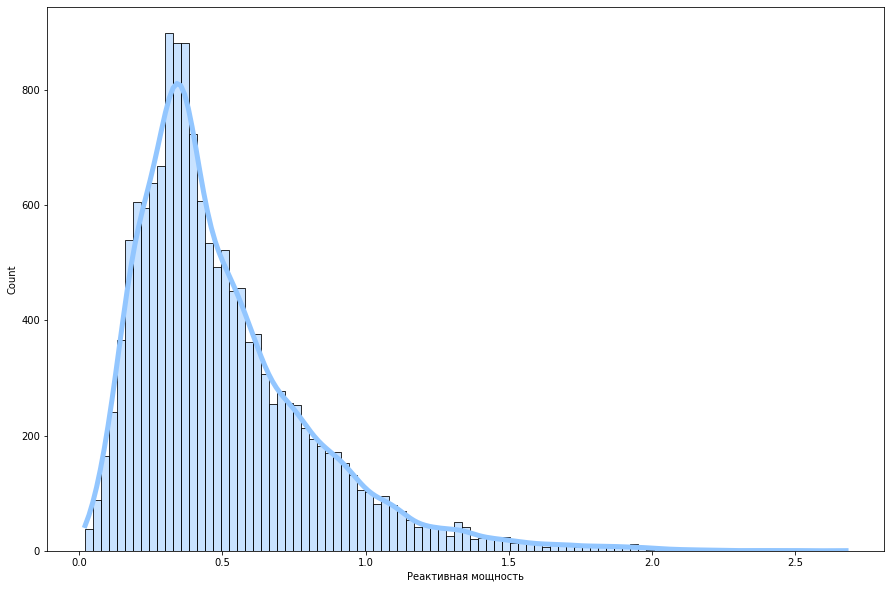

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(df_arc['Активная мощность'], kde=True, line_kws={'linewidth':5})
plt.show()

plt.figure(figsize=(15,10))
sns.histplot(df_arc['Реактивная мощность'], kde=True, line_kws={'linewidth':5})
plt.show()

Как видно из графиков, есть значения, которые уходят от нормального распределения. У заказчика необходимо выяснить, являются ли эти значения выбросами или такая подача мощностей была необходима для очистки стали. 

**Рассмотрим таблицы подачи материалов при плавке:**

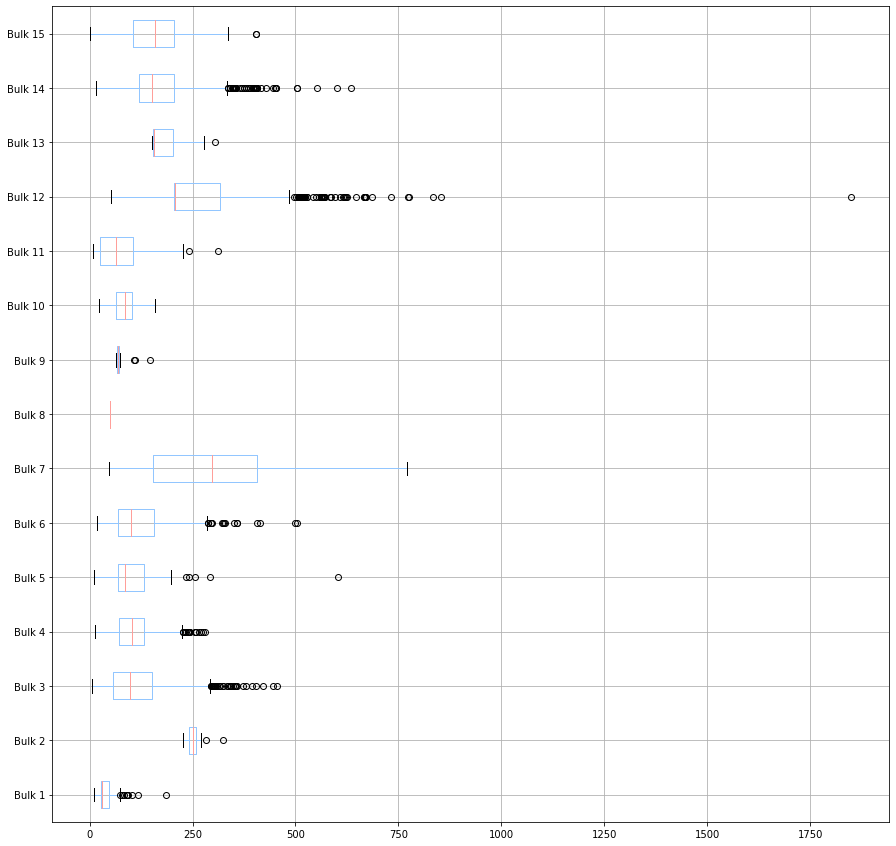

In [10]:
plt.figure(figsize=(15, 15))
df_bulk.boxplot([col for col in df_bulk.columns if col != 'key'], vert=False)
plt.show()

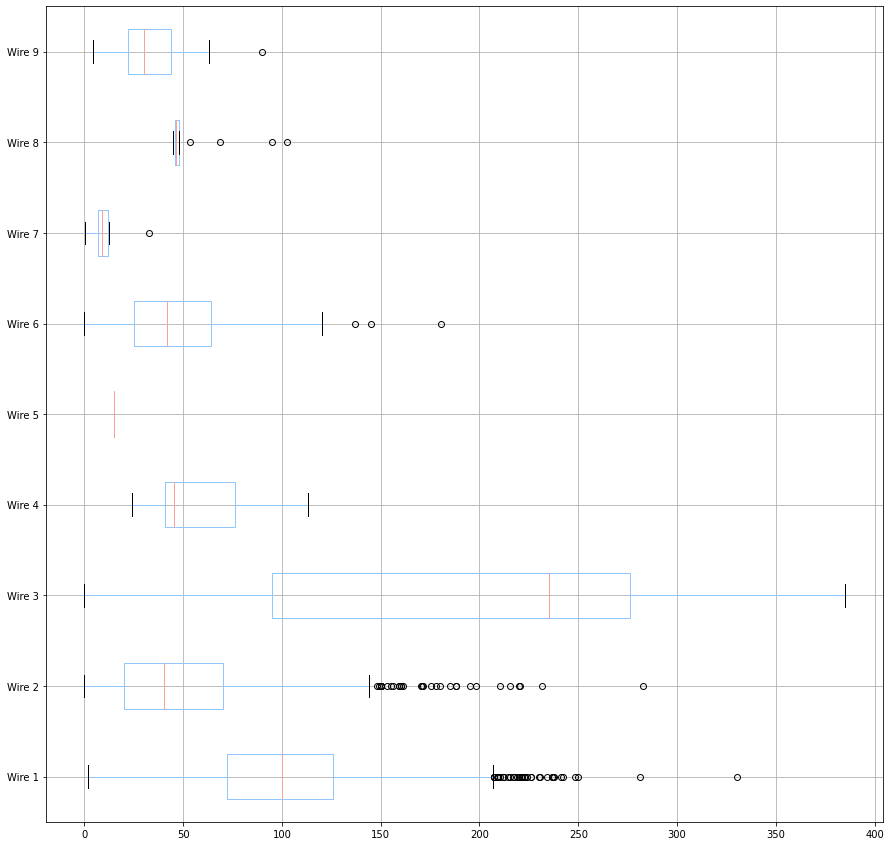

In [11]:
plt.figure(figsize=(15, 15))
df_wire.boxplot([col for col in df_wire.columns if col != 'key'], vert=False)
plt.show()

Как видно из ящиков с усами:

В таблице `df_bulk`:
* Почти все столбцы с небольшимы выбросами (данные за усами)
* `Bulk 8`  добавляли лишь единожды. Возможно такими данными можно пренебречь.
* `Bulk 12` есть аномально большое значение. Думаю такую строку можно исключить, чтобы не исказить модель.

В таблице `df_wire`:
* Почти все столбцы с небольшимы выбросами (данные за усами).
* в `Wire 1` `Wire 2` есть аномальные значения. Думаю такие строки можно исключить, чтобы не исказить модель.
* `Wire 5`  добавляли лишь единожды. Возможно такими данными можно пренебречь.

Общий итог:
* Есть некоторые материалы, которые добавляли очень редко, нужно рассмотреть, как повлияет исключение таких столбцов на модель.
* Нужно выбрать максимальное количество материала, которое добавляют и исключить данные по столбцам, которые будут считаться выбросами. 
* Пропуска можно заполнить значением `0`
* Нужно уточнить - можно ли использовать итоговый объём по столбцам и так же проверить, как повлияет это на итоговую модель.

**Рассмотрим подачу газа:**

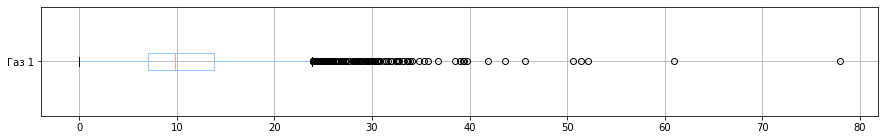

In [12]:
plt.figure(figsize=(15, 2))
df_gas.boxplot('Газ 1', vert=False)
plt.show()

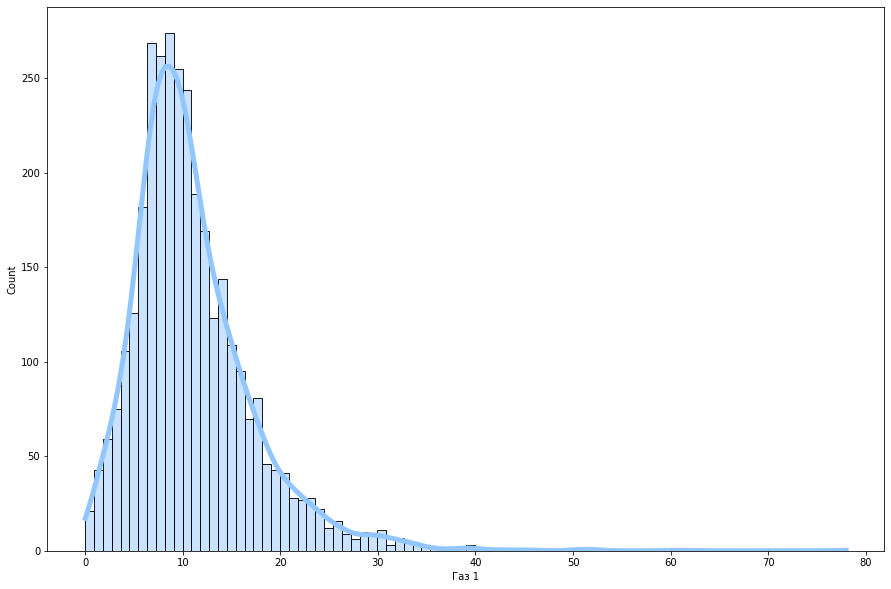

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(df_gas['Газ 1'], kde=True, line_kws={'linewidth':5})
plt.show()

**Исходя из графиков:**

В подаче газа есть выбросы, предположительно значения выше 40. Может это реальные данные. Нужно уточнить у заказчика.

**Рассмотрим измерение температуры:**

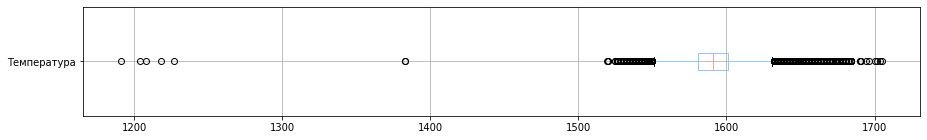

In [14]:
plt.figure(figsize=(15, 2))
df_temp.boxplot('Температура', vert=False)
plt.show()

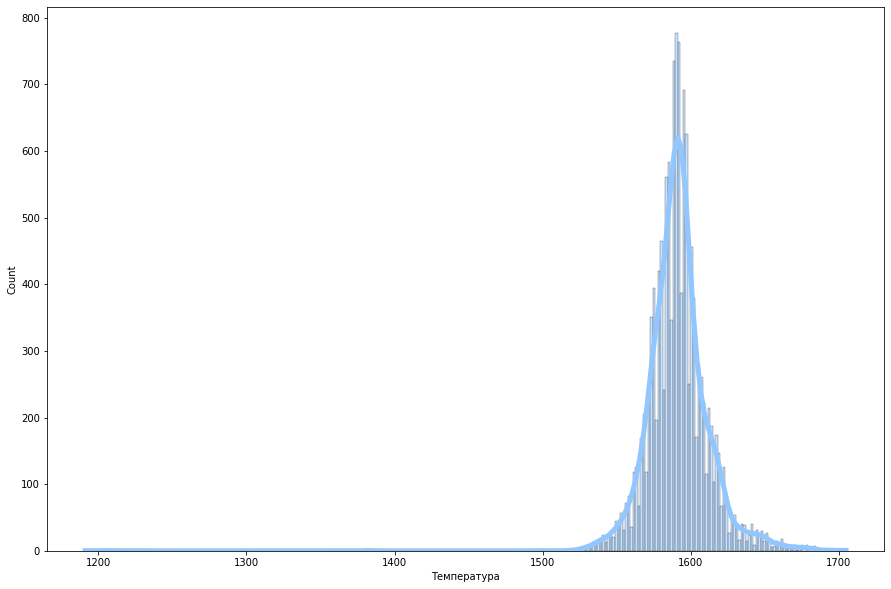

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(df_temp['Температура'], kde=True, line_kws={'linewidth':5})
plt.show()

**Исходя из графиков:**

Температура плавления стали от 1350 до 1535, соотвественно, есть значения, которые значительно ниже. Значения выше 1350 можно оставить.

### Общий вывод:

Исходя из исследования выше:

* В некоторых таблицах есть данные, которые можно посчитать за выбросы. 
* В целевом значении есть пустые строки.
* Есть некоторые материалы для плавления, которые добавляли очень редко, нужно рассмотреть, как повлияет исключение таких столбцов на модель.
* Нужно выбрать максимальное количество материала, которое добавляют и исключить данные по столбцам, которые будут считаться выбросами. 
* В таблицах добавления материалов пропуска можно заполнить значением `0` 
* Нужно уточнить - можно ли использовать итоговый объём по материалам и так же проверить, как повлияет это на итоговую модель.
* В подаче газа есть выбросы, предположительно значения выше 40. Может это реальные данные. Нужно уточнить у заказчика.
* В температуре есть значения сильно ниже плавления стали ими можно пренебречь, как аномальными, значения выше 1350 можно оставить.

## Проверка адекватности исследования

Прежде, чем приступать к объединению таблиц, необходимо проверить на адекватность данные: в частности, сделать таблицу с итоговым значением температуры (целевое значение) и сравнить время конечного измерения температуры с остальными таблицами в которых так же указано время:

* время подачи материала для плавления по двум таблицам
* время нагрева

Для адекватности нужно точно понимать, что конечное измерение температуры было произведено **ПОСЛЕ** всех этапов нагрева и подачи всех материлов.

Начнем проверку:

Таблицу `df_temp` с целевой метрикой преобразуем и найдем целевую - последнее измерение температуры, а так же сохраним данные о первом измерении, как дополнительном параметре:

In [16]:
# преобразовываем в нужный формат
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

# создаём сводную таблицу с первым измерением, для дальнейшего исследования
df_temp_last = df_temp.groupby('key').agg('max')['Время замера']
df_temp_last = pd.DataFrame(df_temp_last)
df_temp_last = df_temp_last.merge(df_temp, on='Время замера', how='left')
df_temp_last.set_axis(['time_last','key','temp_last'], axis = 'columns', inplace = True)

# создаём сводную таблицу с последним измерением, целевой метрикой 
df_temp_first = df_temp.groupby('key').agg('min')['Время замера']
df_temp_first = pd.DataFrame(df_temp_first)
df_temp_first = df_temp_first.merge(df_temp, on='Время замера', how='left')
df_temp_first.set_axis(['time_first','key','temp_first'], axis = 'columns', inplace = True)

# объединяем таблицы
df = df_temp_first.merge(df_temp_last, on='key', how='left')\
                  .reindex(columns=['key', 'time_first', 'temp_first', 'time_last', 'temp_last'])

# сохраним список с пустыми значениями целевой метрики
keys_with_na = list(df[df['temp_last'].isna()]['key'])
keys_not_na = list(df[~df['temp_last'].isna()]['key'])

# посмотрим таблицу
df

,key,time_first,temp_first,time_last,temp_last
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
3211,3237,2019-08-31 22:44:04,1569.0,2019-08-31 23:05:43,NaN
3212,3238,2019-08-31 23:30:31,1584.0,2019-08-31 23:43:00,NaN
3213,3239,2019-09-01 01:31:47,1598.0,2019-09-01 02:24:15,NaN
3214,3240,2019-09-01 02:39:01,1617.0,2019-09-01 03:35:16,NaN


In [17]:
df['temp_last'].isna().sum()

739

In [18]:
df = df.dropna()

Как видно из таблицы, у целевой метрики есть пропуски. Неизвестно, можно ли заполнить такие значения. Если нет - такие строки проще удалить.

Так же удалим те строки, где первое измерение равно последнему, чтобы не допустить утечки данных.

In [19]:
df = df[df['temp_first'] != df['temp_last']]

Создадим функции для проверки адекватности и вывода строк, которые не прошли проверку:

In [20]:
# проверка адекватности построчно

def check_time(row):
    return row['time_last'] == row['max_time']

In [21]:
'''
Функция для объединения таблиц и проверки адекватности с выводом строк, не соответсвующих значению,
так как используются только три оставшиеся таблицы со временем, объединим их всех с таблицей с таблицей
где есть целевая метрика и получим список ключей, которые не прошли адекватность
'''

def list_of_errors(list_of_data):
    data = df[['key', 'time_last']].merge(list_of_data[0], on='key', how='left')
    for dataset in list_of_data[1:]:
        data = data.merge(dataset, on='key', how='left')
    data['max_time'] = data.drop('key', axis=1).max(axis=1)
    data['check_error'] = data.apply(check_time, axis=1)
    keys = list(data[data['check_error'] == 0]['key'])
    return keys

In [22]:
# преобразуем данные в datetime
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

for col in df_bulk_time:
    if col != 'key':
        df_bulk_time[col] = pd.to_datetime(df_bulk_time[col], format='%Y-%m-%d %H:%M:%S')
        
for col in df_wire_time:
    if col != 'key':
        df_wire_time[col] = pd.to_datetime(df_wire_time[col], format='%Y-%m-%d %H:%M:%S')

# создадим сводную таблицу, где есть последнее время нагрева 
df_arc_maxtime = pd.DataFrame(df_arc.groupby('key').agg('max')['Конец нагрева дугой'])
df_arc_maxtime.reset_index(inplace=True)

In [23]:
df_with_time = [df_arc_maxtime, df_bulk_time, df_wire_time]
keys_errors = list_of_errors(df_with_time)

len(keys_errors)

134

### Вывод

На адекватность не прошли 173 строки. Такие строки, можно исключить при дальнейшем объединении и использовании модели.

## Список вопросов заказчику:

Прежде, чем объединять таблицы и заполнять пропуски/удалять аномалии/добавлять параметры, необходимо уточнить следующие вопросы:

1. Являются ли ошибкой выгрузки данных то, что иногда целевая температура замеряется еще до подачи материалов/нагрева? 173 строки не прошли таким образом адекватность, стоит ли их исключить или мне могут предоставить дополнительные данные?
2. При добавлении материалов, какие значения можно считать выбросами? Стоит ли исключить те строки, в которых значения уходят за нормальное распределение и ящиков с усами?
3. Для добавления дополнительных параметров: стоит рассчитать общую мощность или лучше уже рассчитать энергию (мощность на дельту времени)? Или даже оба параметра оставить?
4. Можно ли исключить те материалы, которые добавляли слишком редко? Или лучше взять общее количество материала по отдельности: Bulk и Wire, а может вообще общую сумму по ковшу?
5. Если в целевой метрике нет значений - стоит ли их заполнять медианной по ковшу? Просто их приблизительно 700, что сильно уменьшает количество данных. Но, думаю, может произойти утечка данных из-за того, что будем первое измерение оставлять.
6. Может, стоит добавить еще дополнительные параметры - количество нагревов, например, или количество различных добавок по столбцам Wire и Bulk? Или стоит просто рассмотреть все способы и уже просто удалять те столбцы, которые будут сильно коррелировать с остальными или выдавать низкую метрику?
7. Что еще стоит рассмотреть в таких данных? Что добавить и что удалить?

Прошу так же рассмотреть исследование и дать замечания. А так же, по возможности, дополнить выводы.

## Добавление дополнительных параметров и объединение таблиц


Исключим те партии, которые не прошли адкватность, во всех таблицах, необходимых в объединении:

In [24]:
df = df[~df['key'].isin(keys_errors)]
df_wire = df_wire[~df_wire['key'].isin(keys_errors)]
df_bulk = df_bulk[~df_bulk['key'].isin(keys_errors)]
df_arc = df_arc[~df_arc['key'].isin(keys_errors)]
df_gas = df_gas[~df_gas['key'].isin(keys_errors)]

**Прежде, чем объединять таблицы, добавим дополнительные параметры.**

А так же удалим те параметры, которые будут коррелировать с остальными на более, чем 0.8 по коэффициенту Пирсона.

Начнем с таблицы `Данные об электродах`:

Исходя из физики, полная мощность рассчитывается по формуле:

$$
S = \sqrt{Q^2 + P^2}
$$

**где:**

* S - полная мощность
* Q - активная мощность
* p - реактивная мощность

И дополним расчет полным временем нагрева, а так же посчитаем **энергию** - Время нагрева умноженная на полную мощность.

In [25]:
df_arc['Полная мощность'] = (df_arc['Активная мощность'] ** 2 + df_arc['Реактивная мощность'] ** 2) ** (0.5)

df_arc['Время нагрева'] = (
    df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']
)

df_arc['Время нагрева'] = df_arc['Время нагрева'].apply(pd.Timedelta.total_seconds).astype('int')

df_arc['Энергия'] = df_arc['Время нагрева'] * df_arc['Полная мощность']

df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева,Энергия
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228,272.149755
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185,177.416785
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172,154.118502
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365,719.221394
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148,119.471318
...,...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648,157,100.581755
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559,180,154.000682
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560,184,160.919002
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489,57,15.075853


Создадим сводную таблицу, в которой будет общая сумма времени нагрева и энергии по всей партии, которая войдет в итоговую таблицу:

In [26]:
df_arc_keys = df_arc.groupby('key').sum()[['Время нагрева', 'Энергия', 'Полная мощность']].reset_index()
df_arc_keys

,key,Время нагрева,Энергия,Полная мощность
0,1,1098,1442.377754,5.826395
1,2,811,881.233565,3.649216
2,3,655,525.066777,2.989534
3,4,741,796.911309,3.814962
4,5,869,1199.137958,4.035758
...,...,...,...,...
3075,3237,909,958.336236,4.844982
3076,3238,546,555.867370,2.696542
3077,3239,1216,1013.067719,5.611883
3078,3240,839,729.208940,3.891856


По таблицам материалов, которые добавлялись в партию, заполним пустые значения нулями, и рассмотрим несколько вариантов решений:

1. Взять все столбцы и использовать их в модели.
2. Рассчитать общую сумму добавления материала `Wire` и `Bulk` и добавить итог в общую таблицу.
3. Убрать те материалы, которые добавляли редко и добавить остальные.
4. Рассчитать сумму по редким материалам, а те, которые добавляют часто - оставить без изменений.
5. Рассчитать сумму по редким материалам, а те, которые добавляют часто - оставить без изменений, а так же добавить параметр, в котором указано количество добавок в данной партии.

Для моделирования воспользуемся сначала 5 пунктом и посмотрим на результаты модели:

In [27]:
def make_new_df(data, name):
    
    col_for_sum = []

    for col in data:
        if data[col].isna().sum() >= (len(data) - 1000):
            col_for_sum.append(col)
    
    data[f'count_{name}'] = data.drop('key', axis=1).count(axis=1)
    
    data[f'sum_{name}'] = data[col_for_sum].sum(axis=1)
    
    col_lasted = [col for col in data.columns if col not in col_for_sum]
    
    data = data[col_lasted].fillna(0)
    
    return data

In [28]:
bulk = make_new_df(df_bulk, 'bulk')
wire = make_new_df(df_wire, 'wire')

In [29]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3128
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         3002 non-null   int64  
 1   Bulk 3      3002 non-null   float64
 2   Bulk 12     3002 non-null   float64
 3   Bulk 14     3002 non-null   float64
 4   Bulk 15     3002 non-null   float64
 5   count_bulk  3002 non-null   int64  
 6   sum_bulk    3002 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.6 KB


In [30]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 3080
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2956 non-null   int64  
 1   Wire 1      2956 non-null   float64
 2   Wire 2      2956 non-null   float64
 3   count_wire  2956 non-null   int64  
 4   sum_wire    2956 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 138.6 KB


Создаём итоговую таблицу и сразу удалим те строки, где есть пропуски, так как там у тех партий нет наблюдений в других таблицах:

In [31]:
df = df.drop(['time_first', 'time_last'], axis=1)
df = df.merge(bulk, on='key', how='left')
df = df.merge(wire, on='key', how='left')
df = df.merge(df_arc_keys[['key', 'Время нагрева', 'Энергия', 'Полная мощность']], on='key', how='left')
df = df.merge(df_gas, on='key', how='left')
df = df.dropna()

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2298
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              2171 non-null   int64  
 1   temp_first       2171 non-null   float64
 2   temp_last        2171 non-null   float64
 3   Bulk 3           2171 non-null   float64
 4   Bulk 12          2171 non-null   float64
 5   Bulk 14          2171 non-null   float64
 6   Bulk 15          2171 non-null   float64
 7   count_bulk       2171 non-null   float64
 8   sum_bulk         2171 non-null   float64
 9   Wire 1           2171 non-null   float64
 10  Wire 2           2171 non-null   float64
 11  count_wire       2171 non-null   float64
 12  sum_wire         2171 non-null   float64
 13  Время нагрева    2171 non-null   int32  
 14  Энергия          2171 non-null   float64
 15  Полная мощность  2171 non-null   float64
 16  Газ 1            2171 non-null   float64
dtypes: float64(15)

,key,temp_first,temp_last,Bulk 3,Bulk 12,Bulk 14,Bulk 15,count_bulk,sum_bulk,Wire 1,Wire 2,count_wire,sum_wire,Время нагрева,Энергия,Полная мощность,Газ 1
0,1,1571.0,1613.0,0.0,206.0,150.0,154.0,4.0,43.0,60.059998,0.00000,1.0,0.0,1098,1442.377754,5.826395,29.749986
1,2,1581.0,1602.0,0.0,206.0,149.0,154.0,4.0,73.0,96.052315,0.00000,1.0,0.0,811,881.233565,3.649216,12.555561
2,3,1596.0,1599.0,0.0,205.0,152.0,153.0,4.0,34.0,91.160157,0.00000,1.0,0.0,655,525.066777,2.989534,28.554793
3,4,1601.0,1625.0,0.0,207.0,153.0,154.0,4.0,81.0,89.063515,0.00000,1.0,0.0,741,796.911309,3.814962,18.841219
4,5,1576.0,1602.0,0.0,203.0,151.0,152.0,4.0,78.0,89.238236,9.11456,2.0,0.0,869,1199.137958,4.035758,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2495,1570.0,1591.0,21.0,256.0,129.0,223.0,5.0,90.0,89.150879,0.00000,1.0,0.0,723,778.818234,3.986869,7.125735
2295,2496,1554.0,1591.0,0.0,256.0,129.0,226.0,5.0,185.0,114.179527,0.00000,1.0,0.0,940,875.261419,5.057033,9.412616
2296,2497,1571.0,1589.0,0.0,230.0,124.0,226.0,4.0,85.0,94.086723,9.04800,2.0,0.0,569,556.930349,2.885017,6.271699
2297,2498,1591.0,1594.0,90.0,206.0,129.0,207.0,5.0,101.0,118.110717,0.00000,1.0,0.0,750,767.817794,4.143749,14.953657


Рассмотрим корреляцию параметров:

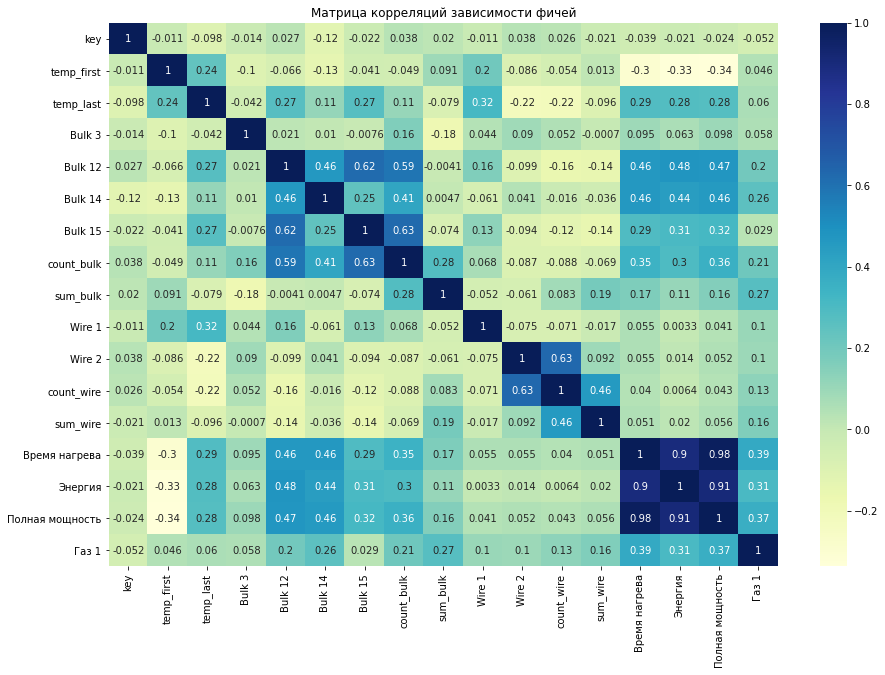

In [32]:
plt.figure(figsize=(15, 10))
plt.title('Матрица корреляций зависимости фичей')

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

plt.show()

Как видно из матрицы коррелляции, есть три параметра, которые мультиколлинеарны:

* Время нагрева
* Полная мощность
* Энергия

Так как из этих параметров мы делали расчет. Перед делением на тренировочную и тестовую, стоит такие параметры удалить.

Остальные параметры можно оставить, так как они не коррелируют между собой на более, чем `0.8` по коэффициенту Пирсона.

## Выбор оптимальной модели

Для моделирования, рассмотрим несколько деревянных моделей и бустинговые модели, основанные на дереве решений:

* Дерево решений
* Случайный лес
* LightGBM
* XGBoost
* CatBoost

Подгрузим необходимые библиотеки:

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from time import time

from sklearn.utils import shuffle

RANDOM_STATE = 42

Разделим датасет на тренировочную и тестовую в соотношении 5 к 1, а так же предварительно перемешаем дополнительно наблюдения, так как в изначальном датасете все данные были распределены по времени:

In [34]:
df_shuffled = shuffle(df, random_state=RANDOM_STATE)

df_shuffled.info()

df_features = df_shuffled.drop(['key', 'temp_last', 'Время нагрева', 'Полная мощность'], axis=1)
df_target = df_shuffled['temp_last']

train_features, test_features, train_target, test_target = train_test_split(df_features, 
                                                                            df_target,
                                                                            test_size=0.20,
                                                                            random_state=RANDOM_STATE)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 1743 to 917
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              2171 non-null   int64  
 1   temp_first       2171 non-null   float64
 2   temp_last        2171 non-null   float64
 3   Bulk 3           2171 non-null   float64
 4   Bulk 12          2171 non-null   float64
 5   Bulk 14          2171 non-null   float64
 6   Bulk 15          2171 non-null   float64
 7   count_bulk       2171 non-null   float64
 8   sum_bulk         2171 non-null   float64
 9   Wire 1           2171 non-null   float64
 10  Wire 2           2171 non-null   float64
 11  count_wire       2171 non-null   float64
 12  sum_wire         2171 non-null   float64
 13  Время нагрева    2171 non-null   int32  
 14  Энергия          2171 non-null   float64
 15  Полная мощность  2171 non-null   float64
 16  Газ 1            2171 non-null   float64
dtypes: float64(1

Создадим функцию для подбора параметров методом GridSearchCV и создадим таблицу, по которой выберем оптимальную модель.

In [35]:
# создаём таблицу для анализа
analisys = pd.DataFrame({'model':[], 'MAE_model':[], 'MAE_on_train':[]})
all_models = []

# создаём функцию для подбора параметров
def train_model(model, parameters):
    
    model_random = GridSearchCV(estimator=model,
                                param_grid=parameters, # используем параметры
                                scoring='neg_mean_absolute_error', # используем необходимую метрику
                                cv=2, 
                                verbose=1)

    # посмотрим время обучения 
    start = time()
    model_random.fit(train_features, train_target)
    print('GridSearchCV подбирал параметры %.2f секунд' %(time() - start))
    
    # высчитаем метрики
    rmse = model_random.best_score_ * -1
    rmse_on_train = mean_absolute_error(train_target, model_random.predict(train_features))
    
    print('Лучшие параметры:', model_random.best_params_)
    print('MAE обученной модели:', rmse)
    print('MAE на тренировочной выборке:', rmse_on_train)
    
    # заполним все таблицы    
    all_models.append(model_random)
    row = []
    row.extend([model, rmse, rmse_on_train])
    analisys.loc[len(analisys.index)] = row
    
    return model_random

**Рассмотрим модели:**

In [36]:
ran_grid_tree = {"max_depth": list(range(3, 12))}

dtr = DecisionTreeRegressor()

dtr_random = train_model(dtr, ran_grid_tree)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
GridSearchCV подбирал параметры 0.10 секунд
Лучшие параметры: {'max_depth': 5}
MAE обученной модели: 7.595592725895951
MAE на тренировочной выборке: 6.497883752883192


In [37]:
ran_grid_forest = {
    'max_depth': list(range(2, 9)),
    'n_estimators': [50, 100, 200, 300]
}

rfr = RandomForestRegressor(n_jobs=-1)

rfr_random = train_model(rfr, ran_grid_forest)

Fitting 2 folds for each of 28 candidates, totalling 56 fits
GridSearchCV подбирал параметры 10.05 секунд
Лучшие параметры: {'max_depth': 8, 'n_estimators': 200}
MAE обученной модели: 6.56279348409867
MAE на тренировочной выборке: 4.637786437245034


In [38]:
rand_lgbm_param = {
    'max_depth': [5, 10, 15, 25, 35],
    'learning_rate': [0.01, 0.1, 0.15]
}

gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'RMSE')

gbm_random = train_model(gbm, rand_lgbm_param)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
GridSearchCV подбирал параметры 1.77 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5}
MAE обученной модели: 6.7770420847831625
MAE на тренировочной выборке: 4.512944058422291


In [39]:
rand_xgb_param = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.15, 0.3]
}

xb = xgb.XGBRegressor(booster='gbtree', 
                      eval_metric='rmse', 
                      use_rmm=True,
                     verbosity=0)

xb_random = train_model(xb, rand_xgb_param)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
GridSearchCV подбирал параметры 2.86 секунд
Лучшие параметры: {'learning_rate': 0.3, 'max_depth': 1}
MAE обученной модели: 6.516410792478219
MAE на тренировочной выборке: 6.016994071995608


In [40]:
rand_cat_param = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1]
}

cat = CatBoostRegressor(verbose=False) 

cat_random = train_model(cat, rand_cat_param)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
GridSearchCV подбирал параметры 29.62 секунд
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 6}
MAE обученной модели: 6.474963882736992
MAE на тренировочной выборке: 5.283260899949053


**Рассмотрим метрики на графиках:**

,model,MAE_model,MAE_on_train,names
0,DecisionTreeRegressor(),7.595593,6.497884,DecisionTree
1,RandomForestRegressor(n_jobs=-1),6.562793,4.637786,RandomForest
2,"LGBMRegressor(metric='RMSE', objective='regres...",6.777042,4.512944,LightGBM
3,"XGBRegressor(base_score=None, booster='gbtree'...",6.516411,6.016994,XGBoost
4,<catboost.core.CatBoostRegressor object at 0x0...,6.474964,5.283261,CatBoost


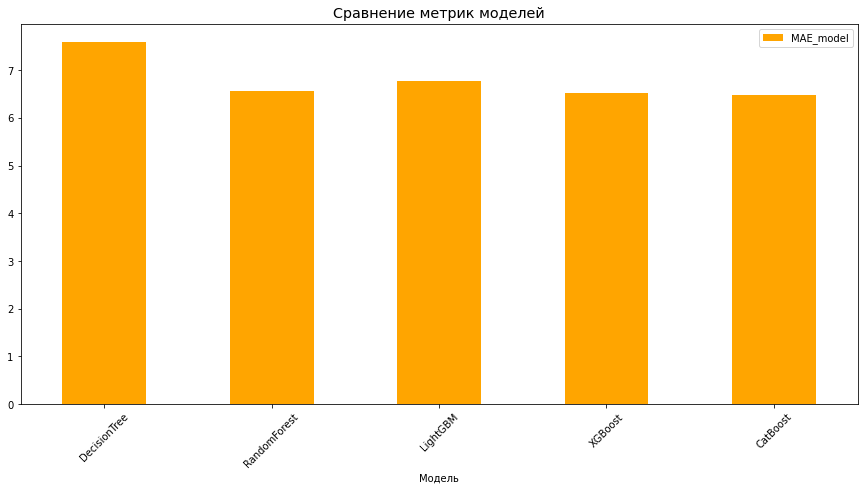

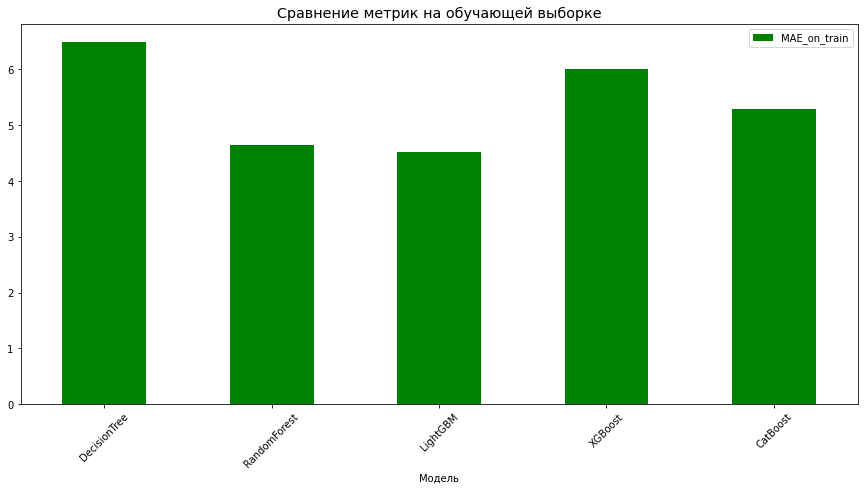

In [41]:
all_names = pd.DataFrame({'names':['DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost', 'CatBoost']})
analisys = pd.concat([analisys, all_names], axis=1, join='inner')
display(analisys)

analisys.plot.bar(y='MAE_model', x='names', rot=45, figsize=(15,7), color='orange')
plt.title('Сравнение метрик моделей', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

analisys.plot.bar(y='MAE_on_train', x='names', rot=45, figsize=(15,7), color='green')
plt.title('Сравнение метрик на обучающей выборке', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

**Вывод:**

Из полученных моделей наилучше всего показала себя модель `CatBoost` с параметрами `learning_rate`: `0.01`, `max_depth`: `6`.

Данную модель можно использовать в тестировании.

## Тестирование модели:

Воспользуемся обученной моделью и посмотрим метрики на тестовой выборке:

In [42]:
predicted = cat_random.predict(test_features)
mae_on_test = mean_absolute_error(test_target, predicted)
print('MAE на тестовой выборке при использовании GridSearchCV:', mae_on_test)

MAE на тестовой выборке при использовании GridSearchCV: 5.809316838391245


Итоговая метрика ниже `6.00`. Модель можно использовать.

**Рассмотрим важность параметров:**

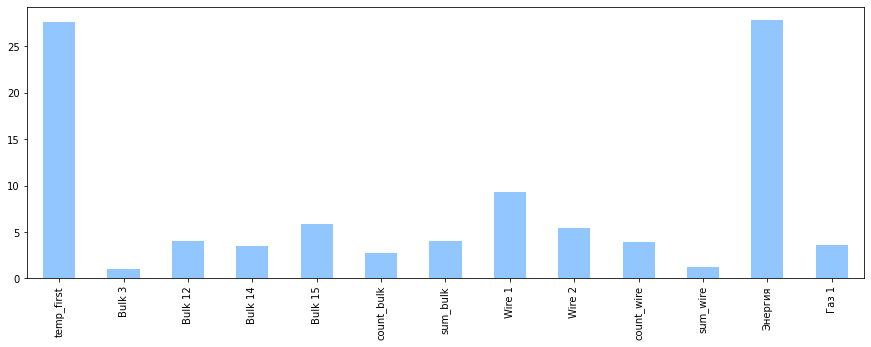

In [43]:
features = pd.Series(cat_random.best_estimator_.feature_importances_, index=train_features.columns)

plt.figure(figsize=(15,5))
features.plot.bar()
plt.show()

Как видно из графика, для итоговой метрики наиболее важны параметры:

* **Энергии, потребляемой при нагреве**, то есть времени нагрева и реактивной и полной мощностей.
* И первом измерении температуры

Заказчику стоит обратить внимание на данные параметры, добавить их в следующие наблюдения, так как они наиболее сильно влияют на **итоговую конечную температуру**.

## Отчет о проделанной работе:

**В отчёте ответьте на вопросы:**

**1. Какие пункты плана были выполнены, а какие — нет (поясните почему)?**

Все пункты плана были выполнены. Работа проделана без серьезных ошибок и проблем.

**2. Какие трудности возникли и как вы их преодолели?**

Основная трудность - выбросы и малое количество наблюдений. Скорее всего данная модель сильно переобучена на тренировочной выборке, что может сказаться на итоговой метрике после использования модели. Но без последующих наблюдений такое сказать трудно. Так же недостаточность параметров: при таком малом количестве наблюдений стоит так же запрашивать у заказчика дополнительные данные, чтобы еще лучше предсказывать метрику.

**3. Какие ключевые шаги в решении задачи выделили?**

Ключевые шаги: предобработка данных, сбор всех данных воедино, расчет новых параметров, и выделение итоговой модели.

**4. Какая ваша итоговая модель и какое у неё качество?**

Итоговая модель - `CatBoost` с параметрами `learning_rate`: `0.01`, `max_depth`: `6`. Итоговая метрика модели `MAE`: `5.809`.